In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import sklearn as sk
import random
random.seed(42)

In [2]:
data, labels = datasets.make_blobs(n_samples = 200, n_features=2,centers=2 ,random_state=20)

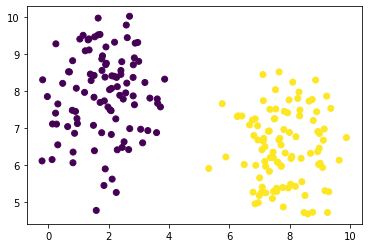

In [3]:
plt.scatter(data[:,0], data[:,1], c = labels)

In [4]:
class LinearSVM:
    def __init__(self,learning_rate=0.001, lambda_param = 0.01, epochs =1000):
        self.lr = learning_rate
        self.lmbda = lambda_param
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def condition(self,x,y):
        return y*(np.dot(x,self.weights)-self.bias) >= 1
    
    def fit(self,X,y):
        n_samples,n_features = X.shape
        y = np.where(y<=0,-1,1)

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx,x_i in enumerate(X):
                if self.condition(x_i,y[idx]): # Update Rule
                    self.weights -= self.lr*(2*self.lmbda*self.weights)
                else:
                    self.weights -= self.lr*(2*self.lmbda*self.weights - np.dot(x_i,y[idx]))
                    self.bias -= self.lr*y[idx]

    def predict(self,X):
        approx = np.dot(X,self.weights) - self.bias
        approx = [0 if i<0 else 1 for i in approx]
        return np.sign(approx)
    
    def accuracy_score(self,X,y):
        y_pred = self.predict(X)
        return np.sum(y_pred == y)/len(y)


In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC()
data_train,data_test,labels_train,labels_test = sk.model_selection.train_test_split(data,labels,test_size=0.2)
model.fit(data_train, labels_train)
print("Sklearn SVM: ",accuracy_score(labels_test, model.predict(data_test)))

cust_model = LinearSVM()
cust_model.fit(data_train,labels_train)
preds = cust_model.predict(data_test)
print("Custom SVM: ",accuracy_score(labels_test,preds))


Sklearn SVM:  1.0
Custom SVM:  1.0


In [6]:
def visualize_svm(model,X,y):
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(data[:, 0], data[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, model.weights, model.bias, 0)
    x1_2 = get_hyperplane_value(x0_2, model.weights, model.bias, 0)

    x1_1_m = get_hyperplane_value(x0_1, model.weights, model.bias, -1)
    x1_2_m = get_hyperplane_value(x0_2, model.weights, model.bias, -1)

    x1_1_p = get_hyperplane_value(x0_1, model.weights, model.bias, 1)
    x1_2_p = get_hyperplane_value(x0_2, model.weights, model.bias, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

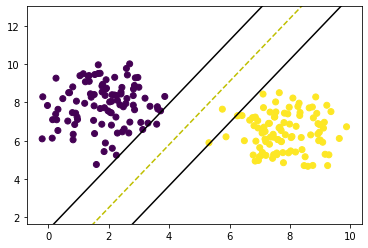

In [7]:
visualize_svm(cust_model,data,labels)